In [508]:
print('Part A')
print('DOMAIN: Medical')
print('CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results')
print('DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part. ')
print('PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.')

Part A
DOMAIN: Medical
CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results
DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part. 
PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.


In [509]:
print('Import all the relevant libraries')
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
#KNN
from sklearn.neighbors import KNeighborsClassifier
# standard scaler
from sklearn.preprocessing import StandardScaler
#label encoder
from sklearn.preprocessing import LabelEncoder
#vizualization
import seaborn as sns   # Why sns?  It's a reference to The West Wing #industry std is sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

Import all the relevant libraries


In [510]:
print('Data Understanding: [5 Marks]\n')
print('A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]')
df_normal = pd.read_csv("Normal.csv")
df_type_h = pd.read_csv("Type_H.csv")
df_type_s = pd.read_csv("Type_S.csv")

Data Understanding: [5 Marks]

A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]


In [511]:
print('B. Print Shape and columns of all the 3 DataFrames. [1 Mark]')
print('The shape and size of normal Data Frame looks like :',df_normal.shape)
print('The shape and size of type-H Data Frame looks like :',df_type_h.shape)
print('The shape and size of type-S Data Frame looks like :',df_type_s.shape)
col=df_normal.columns
col=col.append(df_type_h.columns)
col=col.append(df_type_s.columns)
print('The unique columns of  all the data Frames are:',col.unique())

B. Print Shape and columns of all the 3 DataFrames. [1 Mark]
The shape and size of normal Data Frame looks like : (100, 7)
The shape and size of type-H Data Frame looks like : (60, 7)
The shape and size of type-S Data Frame looks like : (150, 7)
The unique columns of  all the data Frames are: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [512]:
print('C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]\n')
print('There are totally six independent variables and one Dependent varaible')
print('The Dependent Variable is a catergorical multiclass Variable')
print('The independent Variables are all numerical floating point in nature ')

C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

There are totally six independent variables and one Dependent varaible
The Dependent Variable is a catergorical multiclass Variable
The independent Variables are all numerical floating point in nature 


In [513]:
print('D. Print DataTypes of all the 3 DataFrames. [1 Mark]\n')
print('The Data type of normal Data Frame looks like :\n',df_normal.dtypes)
print('The Data type of type-H Data Frame looks like :\n',df_type_h.dtypes)
print('The Data type of type-S Data Frame looks like :\n',df_type_s.dtypes)

D. Print DataTypes of all the 3 DataFrames. [1 Mark]

The Data type of normal Data Frame looks like :
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
The Data type of type-H Data Frame looks like :
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
The Data type of type-S Data Frame looks like :
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [514]:
print('E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]\n')
print('AS we saw Class is of type object which may need to be converted during the model build')
print('The count of values for normal class is :\n',df_normal['Class'].value_counts(),'\nNormal and Nrmal belong to the same class total count is:\n')
print('The count of values for typeH class is :\n',df_type_h['Class'].value_counts(),'\ntype_H and type_h belong to the same class\n ')
print('The count of values for typeS class is :\n',df_type_s['Class'].value_counts(),'\nType_S and type_s belong to the same class\n ')
print('Type S is of highest count with 50 rows')

E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

AS we saw Class is of type object which may need to be converted during the model build
The count of values for normal class is :
 Normal    73
Nrmal     27
Name: Class, dtype: int64 
Normal and Nrmal belong to the same class total count is:

The count of values for typeH class is :
 Type_H    37
type_h    23
Name: Class, dtype: int64 
type_H and type_h belong to the same class
 
The count of values for typeS class is :
 Type_S    133
tp_s       17
Name: Class, dtype: int64 
Type_S and type_s belong to the same class
 
Type S is of highest count with 50 rows


In [515]:
print('2. Data Preparation and Exploration: [5 Marks]\n')
print('A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]\n')
#convert Nrmal to Normal
df_normal['Class'] = df_normal['Class'].str.replace('Nrmal','Normal')
print('the count of class variable in Normal data frame is :',df_normal['Class'].value_counts(),'\n')

#convert Type_H to Type_h
df_type_h['Class'] = df_type_h['Class'].str.replace('Type_H','type_h')
print('the count of class variable in Type_h data frame is :',df_type_h['Class'].value_counts(),'\n')

#convert Type_S to Type_s
df_type_s['Class'] = df_type_s['Class'].str.replace('Type_S','type_s')
df_type_s['Class'] = df_type_s['Class'].str.replace('tp_s','type_s')
print('the count of class variable in Type_s data frame is :',df_type_s['Class'].value_counts(),'\n')

2. Data Preparation and Exploration: [5 Marks]

A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]

the count of class variable in Normal data frame is : Normal    100
Name: Class, dtype: int64 

the count of class variable in Type_h data frame is : type_h    60
Name: Class, dtype: int64 

the count of class variable in Type_s data frame is : type_s    150
Name: Class, dtype: int64 



In [516]:
print('B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]\n')
frames = [df_normal, df_type_h, df_type_s]
df_med = pd.concat(frames,ignore_index=True)
print('After comibing the DF check the rows and column',df_med.shape)

B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]

After comibing the DF check the rows and column (310, 7)


In [517]:
print('C. Print 5 random samples of this DataFrame [1 Marks]\n')
print(df_med.head(5))

C. Print 5 random samples of this DataFrame [1 Marks]

   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal


In [262]:
print('D. Print Feature-wise percentage of Null values. [1 Mark]\n')
percent_missing = df_med.isnull().sum() * 100 / len(df_med)
print(percent_missing)
print('there are no missing or unknown values')

D. Print Feature-wise percentage of Null values. [1 Mark]

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64
there are no missing or unknown values


E. Check 5-point summary of the new DataFrame. [1 Mark]

The describe shows below:
              count        mean        std        min         25%         50%  \
P_incidence  310.0   60.496653  17.236520  26.147921   46.430294   58.691038   
P_tilt       310.0   17.542822  10.008330  -6.554948   10.667069   16.357689   
L_angle      310.0   51.930930  18.554064  14.000000   37.000000   49.562398   
S_slope      310.0   42.953831  13.423102  13.366931   33.347122   42.404912   
P_radius     310.0  117.920655  13.317377  70.082575  110.709196  118.268178   
S_Degree     310.0   26.296694  37.559027 -11.058179    1.603727   11.767934   

                    75%         max  
P_incidence   72.877696  129.834041  
P_tilt        22.120395   49.431864  
L_angle       63.000000  125.742385  
S_slope       52.695888  121.429566  
P_radius     125.467674  163.071041  
S_Degree      41.287352  418.543082  


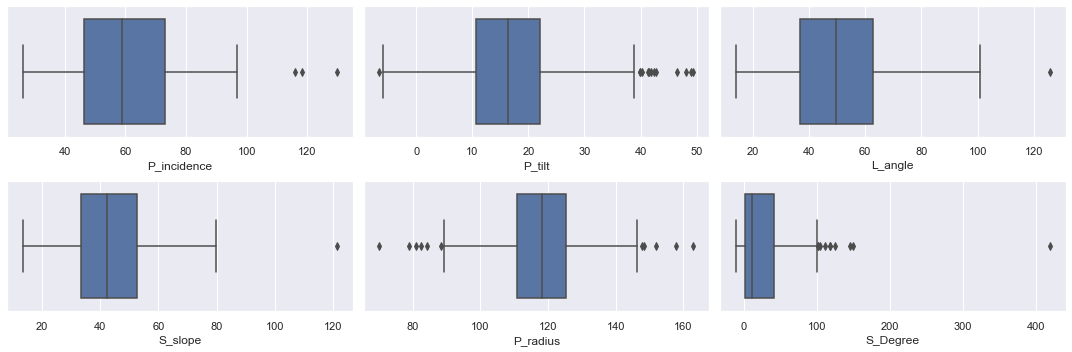

other than P_incidence we seem to have outliers in most of the independent varaibles


In [247]:
print('E. Check 5-point summary of the new DataFrame. [1 Mark]\n')
print('The describe shows below:\n',df_med.describe().T)
fig, ax = plt.subplots(2, 3)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(x=df_med['P_incidence'],ax=ax[0][0]);
sns.boxplot(x=df_med['P_tilt'],ax=ax[0][1]);
sns.boxplot(x=df_med['L_angle'],ax=ax[0][2]);
sns.boxplot(x=df_med['S_slope'],ax=ax[1][0]);
sns.boxplot(x=df_med['P_radius'],ax=ax[1][1]);
sns.boxplot(x=df_med['S_Degree'],ax=ax[1][2]);

fig.tight_layout() 
plt.show()

print('other than P_incidence we seem to have outliers in most of the independent varaibles')

C:\Users\91963\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


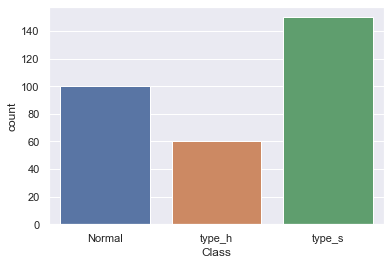

In [248]:
#3 E. Check 5-point summary of the new DataFrame. [1 Mark]\n
sns.countplot(df_med["Class"]);

Data Analysis: [10 Marks]

A. Visualize a heatmap to understand correlation between all features [2 Marks]



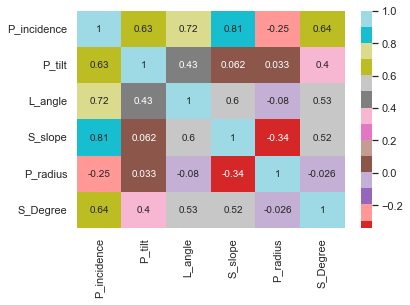

In [249]:
print('Data Analysis: [10 Marks]\n')
print('A. Visualize a heatmap to understand correlation between all features [2 Marks]\n')


# setting the parameter values
cmap = "tab20"
center = 0
  
# plotting the heatmap
hm = sns.heatmap(data=df_med.corr(),
                cmap=cmap,
                center=center,
                annot = True)
  
# displaying the plotted heatmap
plt.show()

In [250]:
print(' B . Share insights on correlation. [2 Marks]')
print('A. Features having stronger correlation with correlation value.')
print('Features having weaker correlation with correlation value\n')

print('The highest level of correaltion is between P_incendence and S_slope positive correaltion at 0.81\nand P_incendence and l_angle positive correaltion at 0.72\n')
print('The next level of correaltion is between P_incendence at and P_tilt positive correaltion at 0.63\n and P_incendence and S_degree positive correaltion at 0.64\n ')
print('Weak correlation is between P_incendence and P_radius at -0.026 and P_tilt and P_radius at 0.033')
print('otherwie the varaibles are not highly correlated')

 B . Share insights on correlation. [2 Marks]
A. Features having stronger correlation with correlation value.
Features having weaker correlation with correlation value

The highest level of correaltion is between P_incendence and S_slope positive correaltion at 0.81
and P_incendence and l_angle positive correaltion at 0.72

The next level of correaltion is between P_incendence at and P_tilt positive correaltion at 0.63
 and P_incendence and S_degree positive correaltion at 0.64
 
Weak correlation is between P_incendence and P_radius at -0.026 and P_tilt and P_radius at 0.033
otherwie the varaibles are not highly correlated


In [240]:
df_med[df_med.index.duplicated()]
df3.set_index(keys='new_index', inplace=True)

In [241]:
df =df_med

(150, 7)

In [ ]:
df.loc[df.index.unique()]

Visualize a pairplot with 3 classes distinguished by colors and share insights



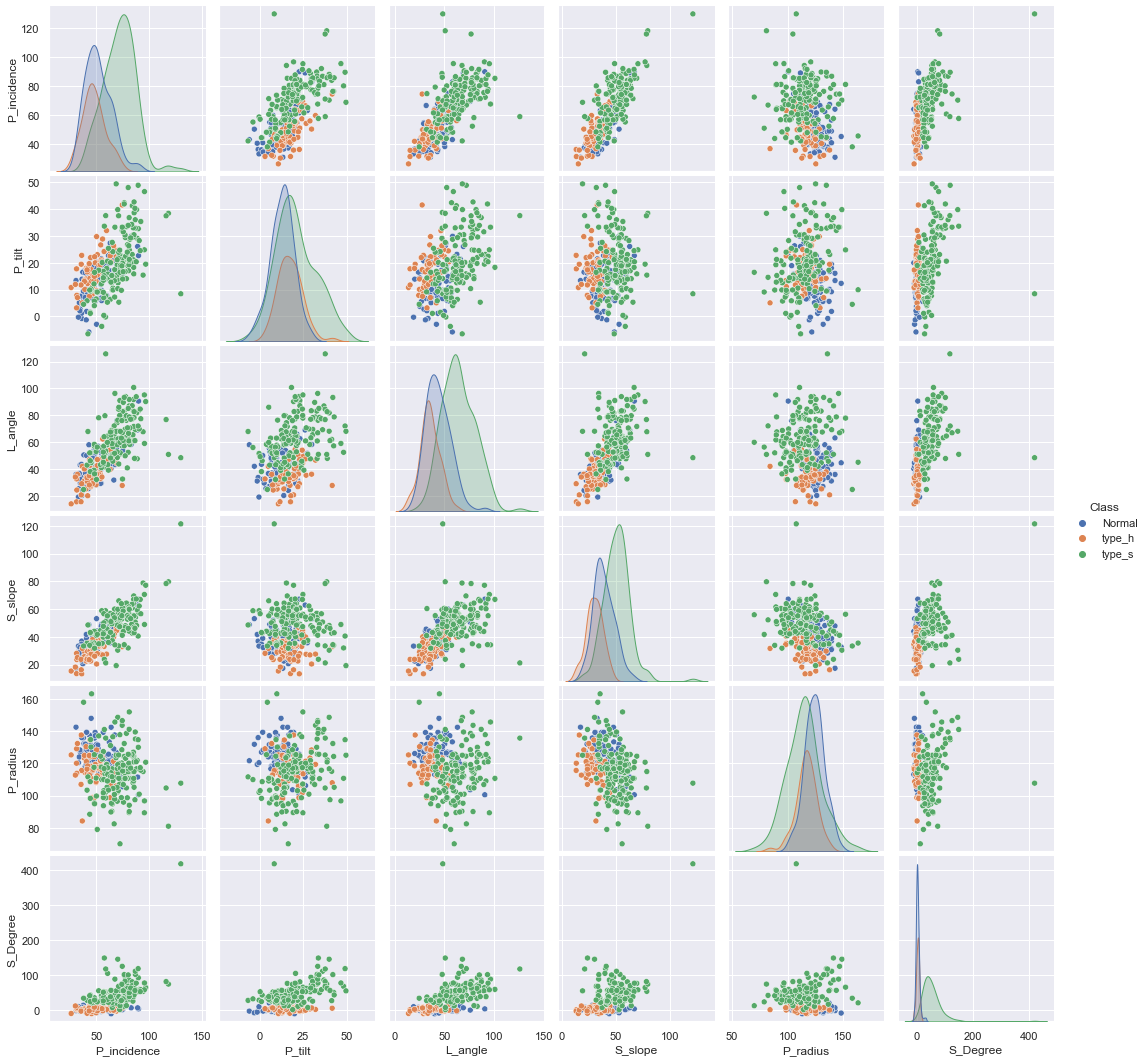

inferences

P_incidence is positively linear with S_slope and L_angle further type_s class is seen when higher value of P_incidence and normal class and type_h is seen for lesser , moderate values of P_incidence  
L_angle and s_slope, L_angle and P_tilt are positively correalted and type_s class is seen when higher value of L_angle in both cases
p_radius has no Relationship with s_degree,p_tilt,l_angle
S_degree has no strong positive Relationship with any of the variables


In [265]:
print('Visualize a pairplot with 3 classes distinguished by colors and share insights\n')
sns.pairplot(df_med,hue='Class')
plt.show()
print('inferences\n')
print('P_incidence is positively linear with S_slope and L_angle further type_s class is seen when higher value of P_incidence and normal class and type_h is seen for lesser , moderate values of P_incidence  ')
print('L_angle and s_slope, L_angle and P_tilt are positively correalted and type_s class is seen when higher value of L_angle in both cases')
print('p_radius has no Relationship with s_degree,p_tilt,l_angle')
print('S_degree has no strong positive Relationship with any of the variables')

Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]

P_incidence is positively highly correalted  with S_slope
type_s class is mainly visible for higher values of P_incidence and S_slope
there seem to be outliers present in type_s class for values of P_incidence and S_slope as well 


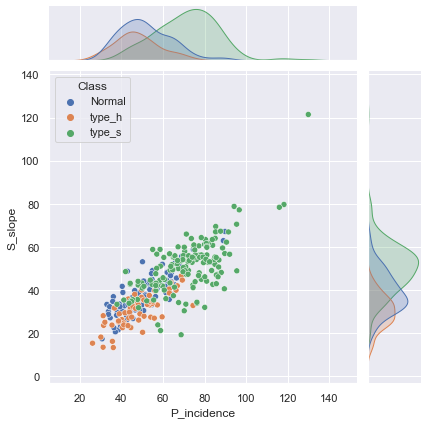

In [272]:
print('Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]\n')
sns.jointplot(data=df_med, x="P_incidence", y="S_slope", hue="Class")
print('P_incidence is positively highly correalted  with S_slope')
print('type_s class is mainly visible for higher values of P_incidence and S_slope')
print('there seem to be outliers present in type_s class for values of P_incidence and S_slope as well ')

Visualize a boxplot to check distribution of the features and share insights. [2 Marks]



C:\Users\91963\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[215, 262, 263]
Count of possible outliers are 3


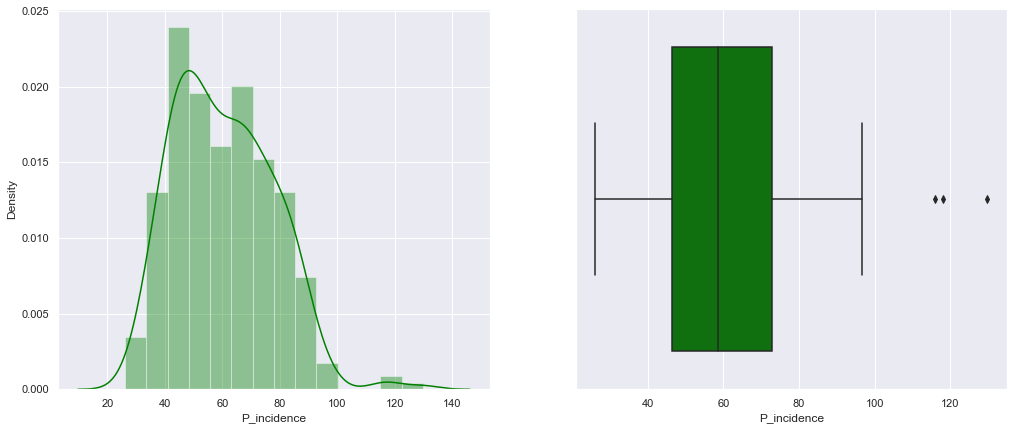

In [531]:
print('Visualize a boxplot to check distribution of the features and share insights. [2 Marks]\n')
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df_med['P_incidence'],  ax=axes[0],color='Green')
sns.boxplot(x = 'P_incidence', data=df_med,  orient='h' , ax=axes[1],color='Green')
#3 D. Check the number of outliers greater than the upper fence. [1 Mark]
q1= df_med['P_incidence'].quantile(0.25)
q3= df_med['P_incidence'].quantile(0.75)
iqr = q3-q1
Threshold=iqr*1.5
lower,upper=q1-Threshold,q3+Threshold
df_dropped_outlier = []
for index, x in enumerate(df_med['P_incidence']):
    if x < lower or x > upper:
       df_dropped_outlier.append(index)
print(df_dropped_outlier)    
print('Count of possible outliers are',len(df_dropped_outlier) )
fig.tight_layout() 
plt.show()


Visualize a boxplot to check distribution of the features and share insights. [2 Marks]



C:\Users\91963\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[151, 165, 175, 184, 212, 222, 236, 241, 245, 279, 291, 302, 306]
Count of possible outliers are 13


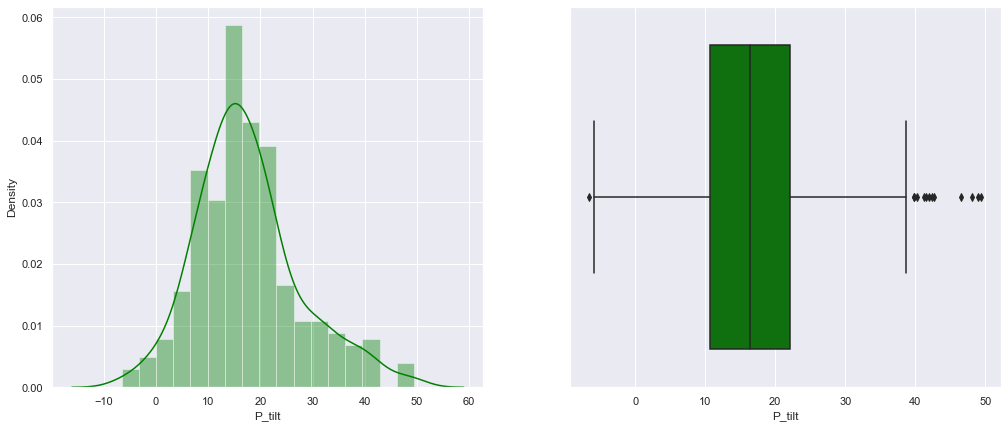

In [532]:
print('Visualize a boxplot to check distribution of the features and share insights. [2 Marks]\n')
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df_med['P_tilt'],  ax=axes[0],color='Green')
sns.boxplot(x = 'P_tilt', data=df_med,  orient='h' , ax=axes[1],color='Green')
#3 D. Check the number of outliers greater than the upper fence. [1 Mark]
q1= df_med['P_tilt'].quantile(0.25)
q3= df_med['P_tilt'].quantile(0.75)
iqr = q3-q1
Threshold=iqr*1.5
lower,upper=q1-Threshold,q3+Threshold
df_dropped_outlier = []
for index, x in enumerate(df_med['P_tilt']):
    if x < lower or x > upper:
       df_dropped_outlier.append(index)
print(df_dropped_outlier)    
print('Count of possible outliers are',len(df_dropped_outlier) )
fig.tight_layout() 
plt.show()



Visualize a boxplot to check distribution of the features and share insights. [2 Marks]



C:\Users\91963\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[297]
Count of possible outliers are 1


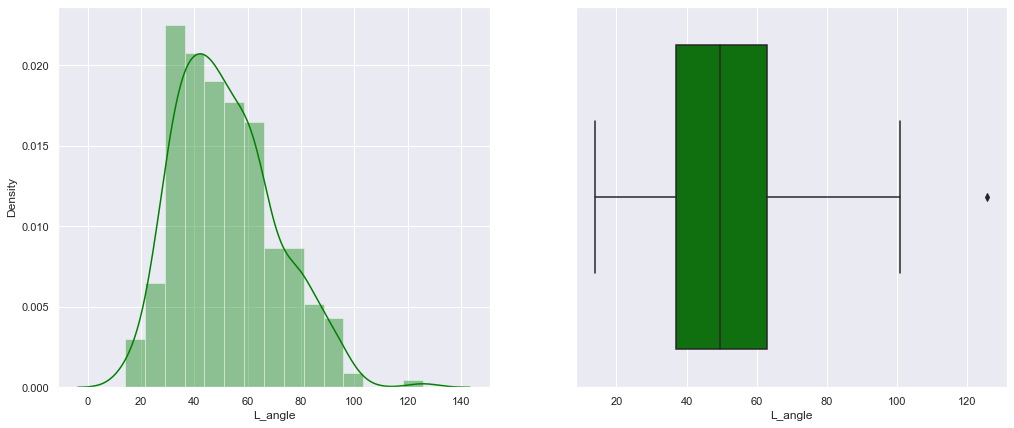

In [533]:
print('Visualize a boxplot to check distribution of the features and share insights. [2 Marks]\n')
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df_med['L_angle'],  ax=axes[0],color='Green')
sns.boxplot(x = 'L_angle', data=df_med,  orient='h' , ax=axes[1],color='Green')
#3 D. Check the number of outliers greater than the upper fence. [1 Mark]
q1= df_med['L_angle'].quantile(0.25)
q3= df_med['L_angle'].quantile(0.75)
iqr = q3-q1
Threshold=iqr*1.5
lower,upper=q1-Threshold,q3+Threshold
df_dropped_outlier = []
for index, x in enumerate(df_med['L_angle']):
    if x < lower or x > upper:
       df_dropped_outlier.append(index)
print(df_dropped_outlier)    
print('Count of possible outliers are',len(df_dropped_outlier) )
fig.tight_layout() 
plt.show()


Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

[215]
Count of possible outliers are 1


C:\Users\91963\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


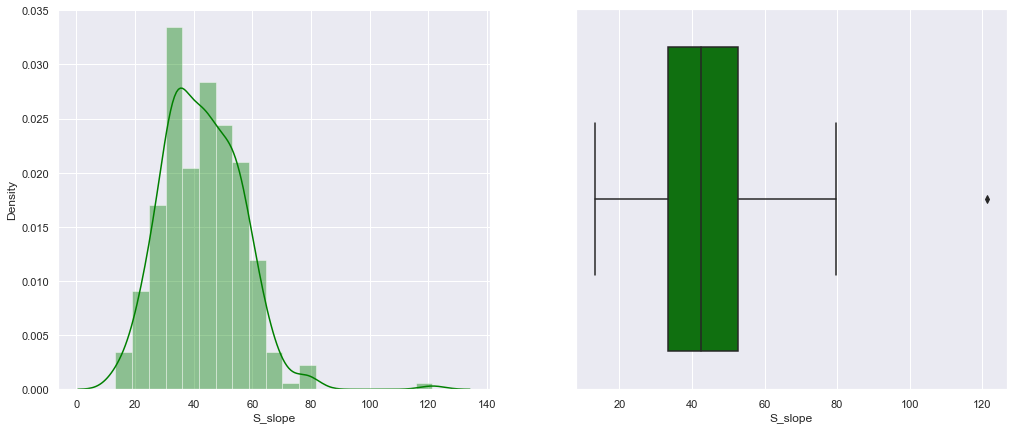

In [534]:
print('Visualize a boxplot to check distribution of the features and share insights. [2 Marks]\n')
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df_med['S_slope'],  ax=axes[0],color='Green')
sns.boxplot(x = 'S_slope', data=df_med,  orient='h' , ax=axes[1],color='Green')
#3 D. Check the number of outliers greater than the upper fence. [1 Mark]
q1= df_med['S_slope'].quantile(0.25)
q3= df_med['S_slope'].quantile(0.75)
iqr = q3-q1
Threshold=iqr*1.5
lower,upper=q1-Threshold,q3+Threshold
df_dropped_outlier = []
for index, x in enumerate(df_med['S_slope']):
    if x < lower or x > upper:
       df_dropped_outlier.append(index)
print(df_dropped_outlier)    
print('Count of possible outliers are',len(df_dropped_outlier) )
fig.tight_layout() 
plt.show()

Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

[94, 109, 175, 183, 185, 255, 262, 267, 273, 280, 290]
Count of possible outliers are 11


C:\Users\91963\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


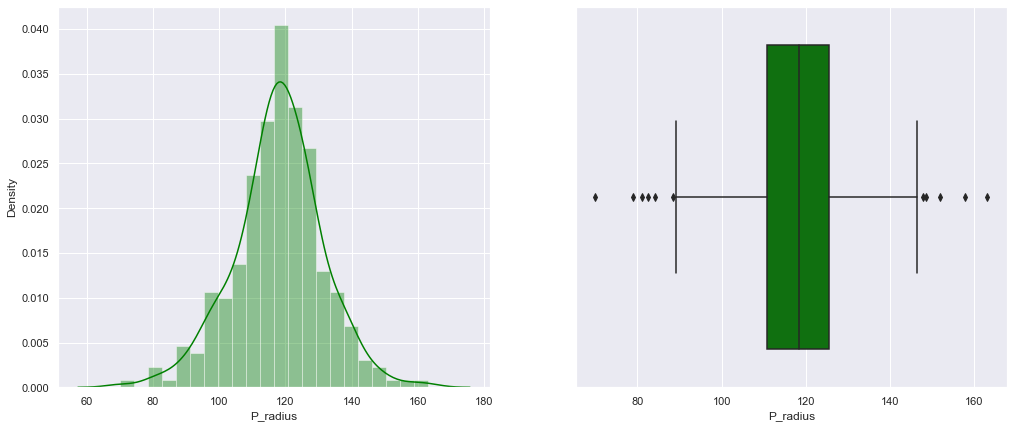

In [535]:
print('Visualize a boxplot to check distribution of the features and share insights. [2 Marks]\n')
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df_med['P_radius'],  ax=axes[0],color='Green')
sns.boxplot(x = 'P_radius', data=df_med,  orient='h' , ax=axes[1],color='Green')
#3 D. Check the number of outliers greater than the upper fence. [1 Mark]
q1= df_med['P_radius'].quantile(0.25)
q3= df_med['P_radius'].quantile(0.75)
iqr = q3-q1
Threshold=iqr*1.5
lower,upper=q1-Threshold,q3+Threshold
df_dropped_outlier = []
for index, x in enumerate(df_med['P_radius']):
    if x < lower or x > upper:
       df_dropped_outlier.append(index)
print(df_dropped_outlier)    
print('Count of possible outliers are',len(df_dropped_outlier) )
fig.tight_layout() 
plt.show()


Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

[171, 175, 176, 195, 215, 241, 243, 292, 297, 302]
Count of possible outliers are 10


C:\Users\91963\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


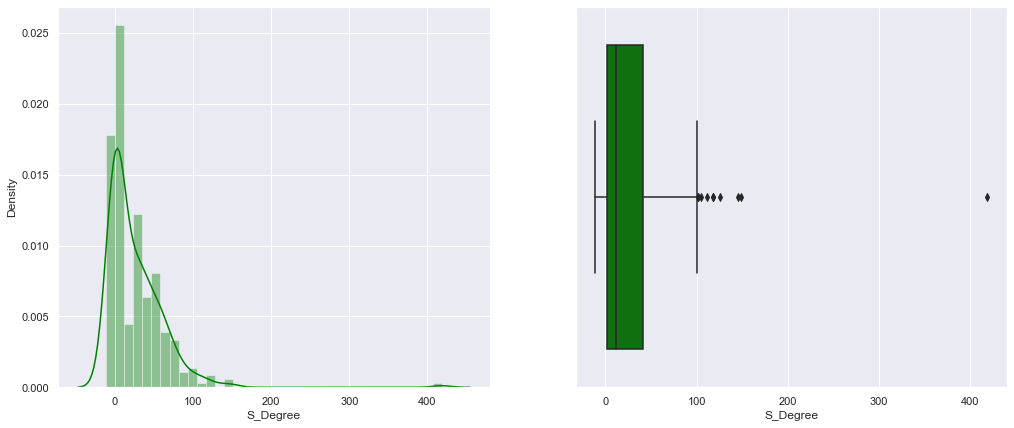

In [536]:
print('Visualize a boxplot to check distribution of the features and share insights. [2 Marks]\n')
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df_med['S_Degree'],  ax=axes[0],color='Green')
sns.boxplot(x = 'S_Degree', data=df_med,  orient='h' , ax=axes[1],color='Green')
#3 D. Check the number of outliers greater than the upper fence. [1 Mark]
q1= df_med['S_Degree'].quantile(0.25)
q3= df_med['S_Degree'].quantile(0.75)
iqr = q3-q1
Threshold=iqr*1.5
lower,upper=q1-Threshold,q3+Threshold
df_dropped_outlier = []
for index, x in enumerate(df_med['S_Degree']):
    if x < lower or x > upper:
       df_dropped_outlier.append(index)
print(df_dropped_outlier)    
print('Count of possible outliers are',len(df_dropped_outlier) )
fig.tight_layout() 
plt.show()

In [438]:
le=LabelEncoder()
df_med['Class']=le.fit_transform(df_med['Class'])
df_med['Class'].value_counts()
print('Normal: 0','Type_H: 1','Type_S: 2')

Normal: 0 Type_H: 1 Type_S: 2


In [439]:
print('as we saw earlier there are lots of outliers , we can replace the outliers by mean')
for c in col:
    #getting upper lower quartile values
    q1,q3=np.percentile(df_med[c],25),np.percentile(df_med[c],75)
    IQR=q3-q1
    Threshold=IQR*1.5
    lower,upper=q1-Threshold,q3+Threshold
    Outliers=[i for i in df_med[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_med_include = df_med.loc[(df_med[c] >= lower) & (df_med[c] <= upper)]
    mean=int(df_med_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df_med[c]=np.where(df_med[c]>upper,mean,df_med[c])
    df_med[c]=np.where(df_med[c]<lower,mean,df_med[c])
    Outliers=[i for i in df_med[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

as we saw earlier there are lots of outliers , we can replace the outliers by mean
 Total Number of outliers in P_incidence Before Imputing : 0


 Mean of P_incidence is 59


 Total Number of outliers in P_incidence After Imputing : 0


 Total Number of outliers in P_tilt Before Imputing : 0


 Mean of P_tilt is 16


 Total Number of outliers in P_tilt After Imputing : 0


 Total Number of outliers in L_angle Before Imputing : 0


 Mean of L_angle is 51


 Total Number of outliers in L_angle After Imputing : 0


 Total Number of outliers in S_slope Before Imputing : 0


 Mean of S_slope is 42


 Total Number of outliers in S_slope After Imputing : 0


 Total Number of outliers in P_radius Before Imputing : 0


 Mean of P_radius is 118


 Total Number of outliers in P_radius After Imputing : 0


 Total Number of outliers in S_Degree Before Imputing : 0


 Mean of S_Degree is 21


 Total Number of outliers in S_Degree After Imputing : 0


 Total Number of outliers in Class Before Imputin

In [440]:
print('Split data into X and Y. [1 Marks]/n')
X = df_med.drop(labels= "Class" , axis = 1)
y = df_med["Class"]

Split data into X and Y. [1 Marks]/n


In [441]:
print('applying StdScaler')
print('we can scale the  all the independent varaibles are in different format\n' )
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(X))

applying StdScaler
we can scale the  all the independent varaibles are in different format



In [442]:
print('Split data into train and test with 80:20 proportion. [1 Marks]\n')
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=1)


Split data into train and test with 80:20 proportion. [1 Marks]



In [453]:
print("build a basic model with a random value of n to see how the model performs and then we can better the model\n")
print('Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]\n')
NNH = KNeighborsClassifier(n_neighbors= 9, metric = 'euclidean',weights = 'distance' )
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)
score_train = NNH.score(X_train, y_train)
print('the accuracy of a basic KNN model with  in train n=9  is:',score_train*100)
score_test = NNH.score(X_test, y_test)
print('the accuracy of a basic KNN model with  in train n=9  is:',score_test*100)

build a basic model with a random value of n to see how the model performs and then we can better the model

Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]

the accuracy of a basic KNN model with  in train n=9  is: 100.0
the accuracy of a basic KNN model with  in train n=9  is: 77.41935483870968


confusion matrix


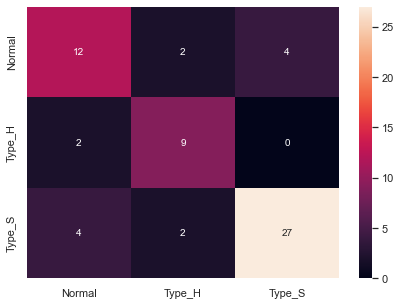

In [447]:
print('confusion matrix')
predicted_labels =  NNH.predict(X_test)
cm = confusion_matrix(y_test, predicted_labels, labels=[0, 1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [448]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        18
           1       0.69      0.82      0.75        11
           2       0.87      0.82      0.84        33

    accuracy                           0.77        62
   macro avg       0.74      0.77      0.75        62
weighted avg       0.78      0.77      0.78        62



In [462]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean',weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

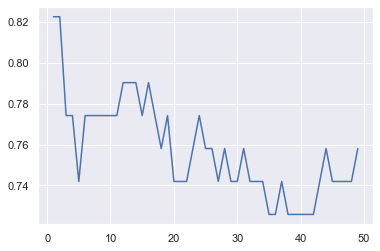

In [463]:
plt.plot(range(1,50),scores)

In [397]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
print(f"Accuracy: {round(accuracy_score(y_test, predicted_test_labels2), 2)}") 
precision_score1 = round(precision_score(y_test, predicted_test_labels2,labels=["Normal", "type_h","type_s"], average='micro'), 2)
print(f"Precision: {precision_score1}")
recal_score1 = round(recall_score(y_test, predicted_test_labels2,labels=["Normal", "type_h","type_s"], average='micro'), 2)
print(f"Recall: {recal_score1}")
f1_score1 = round(f1_score(y_test, predicted_test_labels2,labels=["Normal", "type_h","type_s"], average='micro'), 2)
print(f"F1_score: {f1_score1}")

Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1_score: 0.9


as we can see if n is set to 2 or 3 gives better accuracy

Print all the possible performance metrics for both train and test data. [2 Marks]

Confusion Matrix
the accuracy of a basic KNN model with n=9 in test is: 82.25806451612904


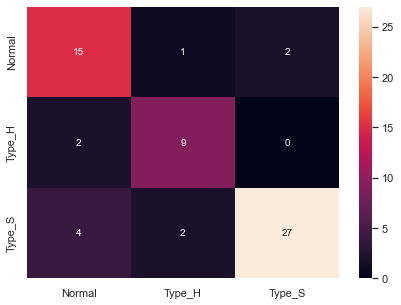

In [455]:
print('as we can see if n is set to 2 or 3 gives better accuracy\n')
#set n to 2 
NNH_2 = KNeighborsClassifier(n_neighbors= 1, weights = 'distance' )
NNH_2.fit(X_train, y_train)
print('Print all the possible performance metrics for both train and test data. [2 Marks]\n')
# calculate accuracy measures and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
predicted_labels = NNH_2.predict(X_test)
score_test = NNH_2.score(X_test, y_test)
print("Confusion Matrix")
print('the accuracy of a basic KNN model with n=9 in test is:',score_test*100)
cm = confusion_matrix(y_test, predicted_labels, labels=[0, 1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [437]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77        18
           1       0.75      0.82      0.78        11
           2       0.93      0.82      0.87        33

    accuracy                           0.82        62
   macro avg       0.80      0.82      0.81        62
weighted avg       0.84      0.82      0.83        62



In [465]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.8225806451612904:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77        18
           1       0.75      0.82      0.78        11
           2       0.93      0.82      0.87        33

    accuracy                           0.82        62
   macro avg       0.80      0.82      0.81        62
weighted avg       0.84      0.82      0.83        62

Accuracy on Training data for k 3 is 0.907258064516129:
Accuracy on Test data for k 3 is 0.7741935483870968:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.62      0.72      0.67        18
           1       0.80      0.73      0.76        11
           2       0.87      0.82      0.84        33

    accuracy                           0.77        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.79      0.77      

euclidiean: 0.835484 (0.061966)
manhattan: 0.838710 (0.069186)


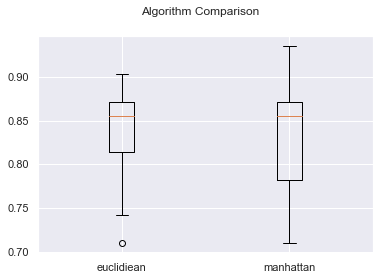

In [665]:
from sklearn import model_selection
KNN_model_euclidiean = KNeighborsClassifier(n_neighbors=13, metric = 'euclidean' ) 
KNN_model_manhattan = KNeighborsClassifier(n_neighbors=13, metric = 'manhattan' ) 
seed = 7
# prepare models
models = []
models.append(('euclidiean', KNN_model_euclidiean))
models.append(('manhattan', KNN_model_manhattan))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [666]:
print('PART B')
print('DOMAIN: Banking, Marketing')
print('A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more')
print('business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation')
print('being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to')
print('increase the conversion ratio to double digit with same budget as per last campaign.')

PART B
DOMAIN: Banking, Marketing
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.


In [667]:
print('Data Understanding: [5 Marks]\n')
print('Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]\n')
df_data1 = pd.read_csv("Data1.csv")
df_data2= pd.read_csv("Data2.csv")
df_data1.head(5)

Data Understanding: [5 Marks]

Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]



,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [668]:
df_data2.head(5)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [669]:
print('Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks] \n')
print('Shape of data1 :',df_data1.shape)
print('Shape of data2 :',df_data2.shape)
print('\n')
print('Columns of data1 :',df_data1.columns)
print('Columns of data2 :',df_data2.columns)
print('\n')
print('Datatypes of data1 :',df_data1.dtypes)
print('Datatypes of data2 :',df_data2.dtypes)

Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks] 

Shape of data1 : (5000, 8)
Shape of data2 : (5000, 7)


Columns of data1 : Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Columns of data2 : Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


Datatypes of data1 : ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object
Datatypes of data2 : ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [670]:
print('Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]\n')
df_bank = pd.merge(df_data1, df_data2, on=['ID'])
print(df_bank.shape)
df_bank.head(5)

Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]

(5000, 14)


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [671]:
print('Change Datatype of below features to ‘Object’ [1 Marks]\n')
print('‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’\n')
df_bank['CreditCard'] = df_bank['CreditCard'].astype('object')
df_bank['InternetBanking'] = df_bank['InternetBanking'].astype('object')
df_bank['FixedDepositAccount'] = df_bank['FixedDepositAccount'].astype('object')
df_bank['Security'] = df_bank['Security'].astype('object')
df_bank['Level'] = df_bank['Level'].astype('object')
df_bank['HiddenScore'] = df_bank['HiddenScore'].astype('object')
df_bank.dtypes

Change Datatype of below features to ‘Object’ [1 Marks]

‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’



ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

converting LoanOnCard also to object 
Number of true cases: 480 (9.64%)
Number of false cases: 4500 (90.36%)
most of the customers donot have LoanOnCard
There is imbalance in Target variable with almost 90% data in 0 and 10% data in 1.


C:\Users\91963\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


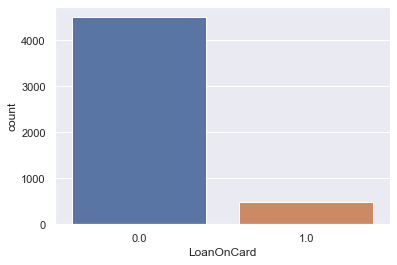

In [672]:
print('Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]\n')
print('converting LoanOnCard also to object ')
df_bank['LoanOnCard'] = df_bank['LoanOnCard'].astype('object')
sns.countplot(df_bank["LoanOnCard"]);
n_true = len(df_bank.loc[df_bank['LoanOnCard'] == True])
n_false = len(df_bank.loc[df_bank['LoanOnCard'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))
print('most of the customers donot have LoanOnCard')
print('There is imbalance in Target variable with almost 90% data in 0 and 10% data in 1.')

In [673]:
print('Id column is not useful in model building so dropping that feature')
df_bank.drop('ID',axis=1,inplace=True)

Id column is not useful in model building so dropping that feature


In [674]:
print('Check the percentage of missing values and impute if required. [1 Marks]\n')
print('check null values in the data\n')
print(df_bank.isna().sum())
print('there are some missing values on the LoanOnCard target varible which may have to be treated ')
df_bank.dropna(axis=0,inplace=True)

Check the percentage of missing values and impute if required. [1 Marks]

check null values in the data

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64
there are some missing values on the LoanOnCard target varible which may have to be treated 


In [675]:
print(df_bank.isna().sum())

Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64


In [676]:
df_bank.head(5)

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0


In [677]:
print('check the distribution on a high end perspective with describe on the mean ,median 1st , 25th , 75th quantile')
df_bank.describe().T

check the distribution on a high end perspective with describe on the mean ,median 1st , 25th , 75th quantile


,count,mean,std,min,25%,50%,75%,max
Age,4980.0,45.352610,11.464212,23.0,35.0,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.0,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.0,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.0,93407.0,94608.000,96651.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.7,1.5,2.525,10.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.0,0.0,101.000,635.0


In [678]:
print(' distribution of Age and CustomerSince seems to be Normal\n')
print(' HighestSpend  and MonthlyAverageSpend are Right Skewed \n')
print(' Mortgage has to be looked closely as median is zero and mean is 56 \n')

 distribution of Age and CustomerSince seems to be Normal

 HighestSpend  and MonthlyAverageSpend are Right Skewed 

 Mortgage has to be looked closely as median is zero and mean is 56 



Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

checking outliers for Age

[]
Count of possible outliers are 0


C:\Users\91963\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


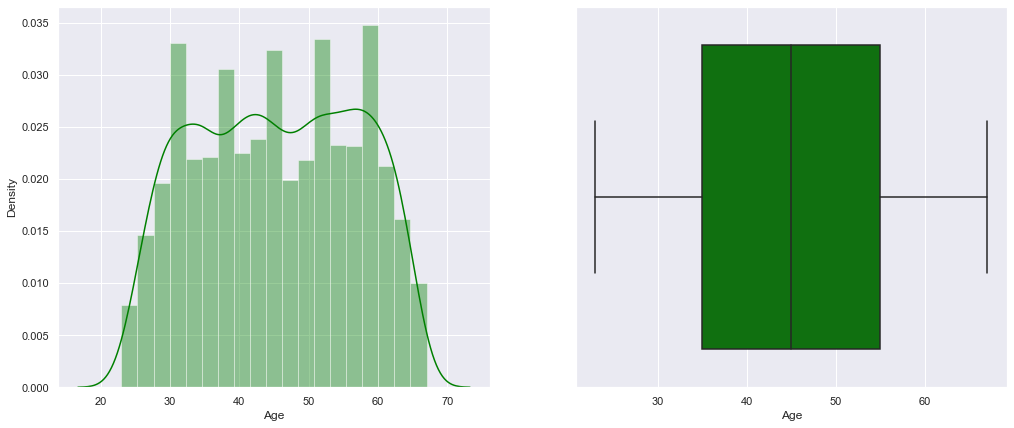

Age seems to follow a normal distribution and does not have outliers



In [679]:
print('Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]\n')
print('checking outliers for Age\n')
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df_bank['Age'],  ax=axes[0],color='Green')
sns.boxplot(x = 'Age', data=df_bank,  orient='h' , ax=axes[1],color='Green')
#3 D. Check the number of outliers greater than the upper fence. [1 Mark]
q1= df_bank['Age'].quantile(0.25)
q3= df_bank['Age'].quantile(0.75)
iqr = q3-q1
Threshold=iqr*1.5
lower,upper=q1-Threshold,q3+Threshold
df_dropped_outlier = []
for index, x in enumerate(df_bank['Age']):
    if x < lower or x > upper:
       df_dropped_outlier.append(index)
print(df_dropped_outlier)    
print('Count of possible outliers are',len(df_dropped_outlier) )
fig.tight_layout() 
plt.show()
print('Age seems to follow a normal distribution and does not have outliers\n')

Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

checking outliers for CustomerSince



C:\Users\91963\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]
Count of possible outliers are 0


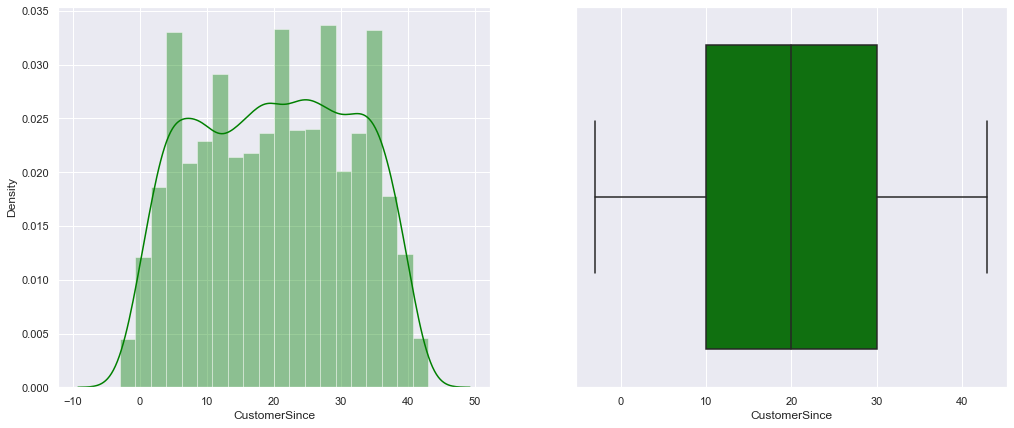

CustomerSince seems to follow a normal distribution and does not have outliers



In [680]:
print('Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]\n')
print('checking outliers for CustomerSince\n')
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df_bank['CustomerSince'],  ax=axes[0],color='Green')
sns.boxplot(x = 'CustomerSince', data=df_bank,  orient='h' , ax=axes[1],color='Green')
#3 D. Check the number of outliers greater than the upper fence. [1 Mark]
q1= df_bank['CustomerSince'].quantile(0.25)
q3= df_bank['CustomerSince'].quantile(0.75)
iqr = q3-q1
Threshold=iqr*1.5
lower,upper=q1-Threshold,q3+Threshold
df_dropped_outlier = []
for index, x in enumerate(df_bank['CustomerSince']):
    if x < lower or x > upper:
       df_dropped_outlier.append(index)
print(df_dropped_outlier)    
print('Count of possible outliers are',len(df_dropped_outlier) )
fig.tight_layout() 
plt.show()
print('CustomerSince seems to follow a normal distribution and does not have outliers\n')

Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

checking outliers for HighestSpend

[9, 38, 44, 50, 283, 309, 439, 506, 657, 720, 759, 762, 767, 894, 897, 920, 994, 1047, 1064, 1077, 1110, 1147, 1184, 1257, 1287, 1300, 1375, 1412, 1484, 1531, 1532, 1572, 1617, 1646, 1684, 1691, 1696, 1699, 1763, 1765, 1804, 1881, 1892, 1915, 2067, 2081, 2176, 2195, 2226, 2258, 2299, 2317, 2427, 2626, 2684, 2733, 2821, 2839, 2884, 2914, 2936, 2968, 3104, 3292, 3331, 3438, 3463, 3523, 3548, 3588, 3619, 3738, 3784, 3801, 3876, 3923, 3989, 4000, 4022, 4102, 4136, 4205, 4247, 4262, 4272, 4289, 4464, 4543, 4554, 4586, 4635, 4639, 4650, 4875, 4961, 4973]

C:\Users\91963\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Count of possible outliers are 96


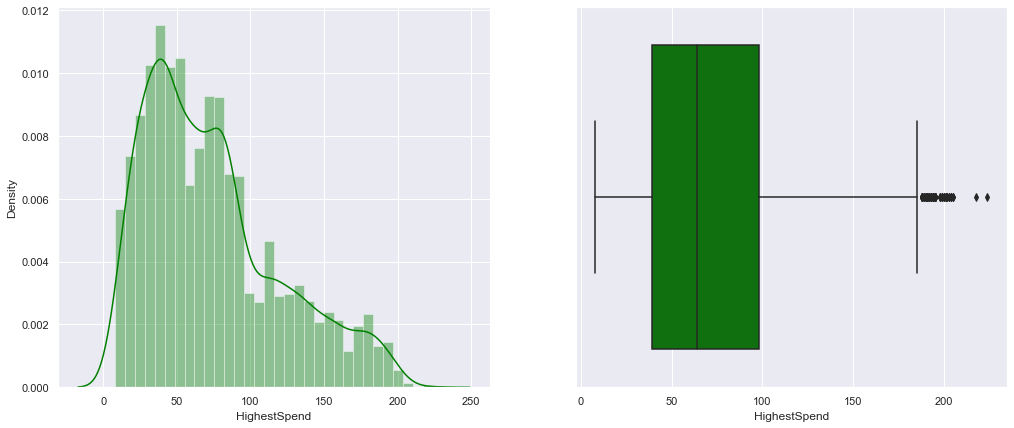

HighestSpend seems to follow a right skewed distribution  seems to have outliers above the max values



In [681]:
print('Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]\n')
print('checking outliers for HighestSpend\n')
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df_bank['HighestSpend'],  ax=axes[0],color='Green')
sns.boxplot(x = 'HighestSpend', data=df_bank,  orient='h' , ax=axes[1],color='Green')
#3 D. Check the number of outliers greater than the upper fence. [1 Mark]
q1= df_bank['HighestSpend'].quantile(0.25)
q3= df_bank['HighestSpend'].quantile(0.75)
iqr = q3-q1
Threshold=iqr*1.5
lower,upper=q1-Threshold,q3+Threshold
df_dropped_outlier = []
for index, x in enumerate(df_bank['HighestSpend']):
    if x < lower or x > upper:
       df_dropped_outlier.append(index)
print(df_dropped_outlier)    
print('Count of possible outliers are',len(df_dropped_outlier) )
fig.tight_layout() 
plt.show()
print('HighestSpend seems to follow a right skewed distribution  seems to have outliers above the max values\n')

Number of ones: 1466 (29.44%)
Number of twos: 1293 (25.96%)
Number of threes: 1006 (20.20%)
Number of fours: 1215 (24.40%)
HiddenScore has a balanced data


C:\Users\91963\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


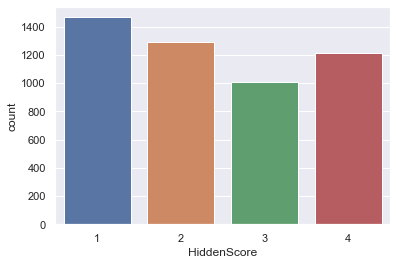

In [682]:
sns.countplot(df_bank["HiddenScore"]);
n_1 = len(df_bank.loc[df_bank['HiddenScore'] == 1])
n_2 = len(df_bank.loc[df_bank['HiddenScore'] == 2])
n_3 = len(df_bank.loc[df_bank['HiddenScore'] == 3])
n_4 = len(df_bank.loc[df_bank['HiddenScore'] == 4])
print("Number of ones: {0} ({1:2.2f}%)".format(n_1, (n_1 / (n_1 + n_2 +n_3 +n_4)) * 100 ))
print("Number of twos: {0} ({1:2.2f}%)".format(n_2, (n_2 / (n_1 + n_2 +n_3+n_4)) * 100 ))
print("Number of threes: {0} ({1:2.2f}%)".format(n_3, (n_3 / (n_1 + n_2 +n_3+n_4)) * 100 ))
print("Number of fours: {0} ({1:2.2f}%)".format(n_4, (n_4 / (n_1 + n_2 +n_3+n_4)) * 100 ))
print('HiddenScore has a balanced data')

Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

checking outliers for MonthlyAverageSpend

[0, 9, 35, 46, 52, 70, 111, 125, 130, 131, 140, 152, 154, 174, 193, 207, 223, 231, 279, 281, 282, 291, 304, 309, 328, 331, 341, 345, 369, 380, 402, 403, 412, 442, 443, 454, 455, 459, 474, 489, 506, 524, 534, 550, 557, 569, 577, 594, 595, 616, 621, 661, 683, 684, 705, 710, 720, 750, 759, 762, 763, 764, 765, 767, 780, 785, 787, 814, 861, 871, 889, 895, 897, 915, 932, 988, 1003, 1018, 1030, 1044, 1059, 1064, 1096, 1105, 1129, 1143, 1170, 1172, 1200, 1217, 1224, 1253, 1257, 1284, 1287, 1301, 1308, 1319, 1329, 1334, 1388, 1391, 1411, 1412, 1427, 1475, 1478, 1500, 1501, 1521, 1572, 1580, 1583, 1606, 1609, 1617, 1631, 1632, 1675, 1676, 1684, 1691, 1696, 1699, 1732, 1745, 1748, 1772, 1777, 1804, 1805, 1810, 1823, 1848, 1864, 1870, 1881, 1898, 1942, 1974, 1985, 1994, 2018, 2021, 2026, 2039, 2056, 2057, 2067, 2081, 2083, 2089, 2124, 2129, 2171, 2206,

C:\Users\91963\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


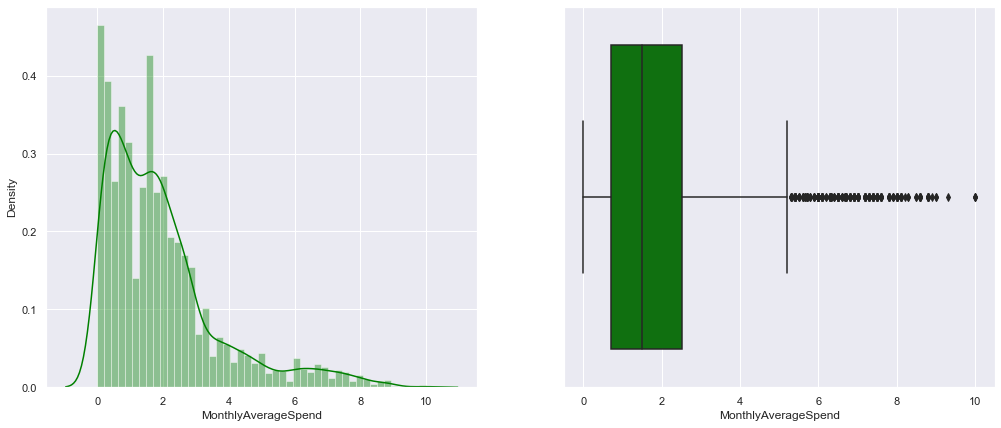

MonthlyAverageSpend seems to follow a right skewed distribution  seems to have outliers above the max values



In [683]:
print('Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]\n')
print('checking outliers for MonthlyAverageSpend\n')
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df_bank['MonthlyAverageSpend'],  ax=axes[0],color='Green')
sns.boxplot(x = 'MonthlyAverageSpend', data=df_bank,  orient='h' , ax=axes[1],color='Green')
#3 D. Check the number of outliers greater than the upper fence. [1 Mark]
q1= df_bank['MonthlyAverageSpend'].quantile(0.25)
q3= df_bank['MonthlyAverageSpend'].quantile(0.75)
iqr = q3-q1
Threshold=iqr*1.5
lower,upper=q1-Threshold,q3+Threshold
df_dropped_outlier = []
for index, x in enumerate(df_bank['MonthlyAverageSpend']):
    if x < lower or x > upper:
       df_dropped_outlier.append(index)
print(df_dropped_outlier)    
print('Count of possible outliers are',len(df_dropped_outlier) )
fig.tight_layout() 
plt.show()
print('MonthlyAverageSpend seems to follow a right skewed distribution  seems to have outliers above the max values\n')

Number of ones: 2089 (41.95%)
Number of twos: 1395 (28.01%)
Number of threes: 1496 (30.04%)
Level has a balanced data


C:\Users\91963\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


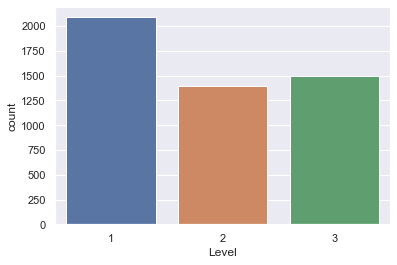

In [684]:
sns.countplot(df_bank["Level"]);
n_1 = len(df_bank.loc[df_bank['Level'] == 1])
n_2 = len(df_bank.loc[df_bank['Level'] == 2])
n_3 = len(df_bank.loc[df_bank['Level'] == 3])
print("Number of ones: {0} ({1:2.2f}%)".format(n_1, (n_1 / (n_1 + n_2 +n_3)) * 100 ))
print("Number of twos: {0} ({1:2.2f}%)".format(n_2, (n_2 / (n_1 + n_2 +n_3)) * 100 ))
print("Number of threes: {0} ({1:2.2f}%)".format(n_3, (n_3 / (n_1 + n_2 +n_3)) * 100 ))
print('Level has a balanced data')

Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

checking outliers for Mortgage



C:\Users\91963\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[13, 30, 33, 50, 57, 92, 99, 110, 167, 189, 222, 228, 231, 268, 283, 307, 315, 318, 334, 342, 345, 385, 439, 453, 459, 466, 506, 508, 520, 550, 564, 567, 590, 620, 625, 651, 659, 664, 731, 744, 762, 785, 796, 820, 843, 863, 868, 871, 875, 889, 895, 915, 928, 932, 953, 978, 987, 990, 994, 1003, 1030, 1057, 1091, 1142, 1144, 1147, 1212, 1253, 1257, 1260, 1268, 1274, 1281, 1283, 1284, 1308, 1319, 1334, 1339, 1352, 1375, 1387, 1404, 1446, 1455, 1493, 1502, 1538, 1562, 1563, 1579, 1603, 1645, 1654, 1668, 1696, 1712, 1716, 1760, 1763, 1769, 1807, 1815, 1822, 1846, 1851, 1855, 1862, 1869, 1886, 1917, 1934, 1950, 1982, 1989, 2007, 2014, 2021, 2054, 2056, 2067, 2070, 2078, 2139, 2170, 2183, 2197, 2212, 2226, 2271, 2297, 2299, 2303, 2321, 2322, 2325, 2362, 2374, 2377, 2402, 2408, 2414, 2423, 2449, 2466, 2478, 2480, 2492, 2518, 2521, 2570, 2573, 2633, 2644, 2648, 2667, 2694, 2729, 2733, 2748, 2749, 2753, 2756, 2792, 2797, 2800, 2821, 2836, 2839, 2847, 2865, 2901, 2914, 2921, 2922, 2926, 2927, 293

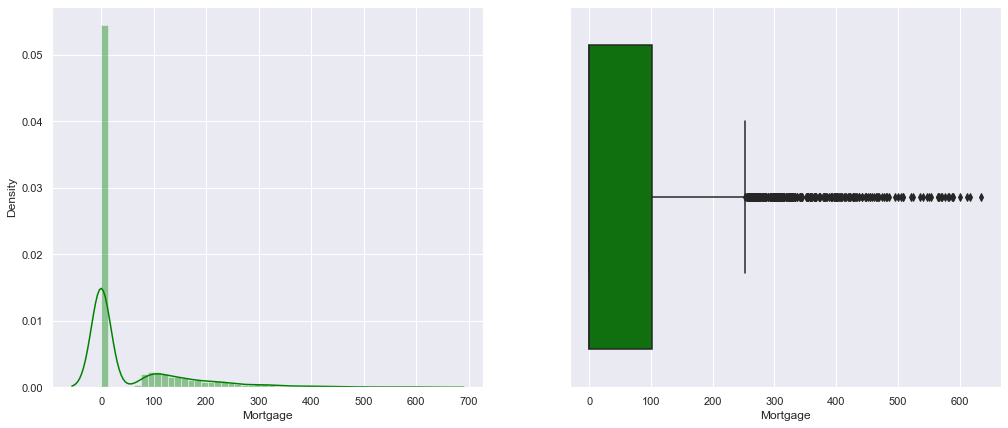

Mortgage seems have lots of outliers



In [685]:

print('Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]\n')
print('checking outliers for Mortgage\n')
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df_bank['Mortgage'],  ax=axes[0],color='Green')
sns.boxplot(x = 'Mortgage', data=df_bank,  orient='h' , ax=axes[1],color='Green')
#3 D. Check the number of outliers greater than the upper fence. [1 Mark]
q1= df_bank['Mortgage'].quantile(0.25)
q3= df_bank['Mortgage'].quantile(0.75)
iqr = q3-q1
Threshold=iqr*1.5
lower,upper=q1-Threshold,q3+Threshold
df_dropped_outlier = []
for index, x in enumerate(df_bank['Mortgage']):
    if x < lower or x > upper:
       df_dropped_outlier.append(index)
print(df_dropped_outlier)    
print('Count of possible outliers are',len(df_dropped_outlier) )
fig.tight_layout() 
plt.show()
print('Mortgage seems have lots of outliers\n')

Number of zeros: 3514 (70.56%)
Number of ones: 1466 (29.44%)
70.56 % people are not holding CreditCard


C:\Users\91963\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


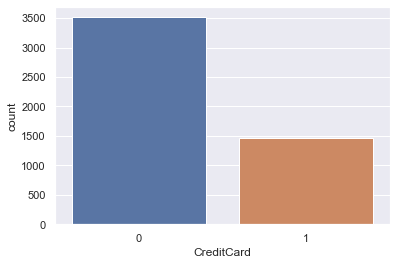

In [686]:
sns.countplot(df_bank["CreditCard"]);
n_0 = len(df_bank.loc[df_bank['CreditCard'] == 0])
n_1 = len(df_bank.loc[df_bank['CreditCard'] == 1])
print("Number of zeros: {0} ({1:2.2f}%)".format(n_0, (n_0 / (n_0 + n_1 )) * 100 ))
print("Number of ones: {0} ({1:2.2f}%)".format(n_1, (n_1 / (n_0 + n_1)) * 100 ))
print('70.56 % people are not holding CreditCard')

C:\Users\91963\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Number of zeros: 4678 (93.94%)
Number of ones: 302 (6.06%)
93% people are not holding FixedDepositAccount


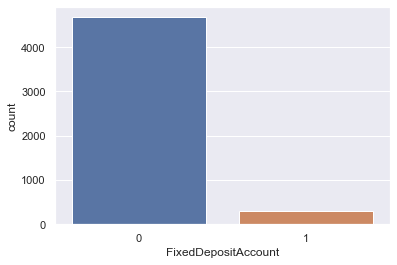

In [687]:
sns.countplot(df_bank["FixedDepositAccount"]);
n_0 = len(df_bank.loc[df_bank['FixedDepositAccount'] == 0])
n_1 = len(df_bank.loc[df_bank['FixedDepositAccount'] == 1])
print("Number of zeros: {0} ({1:2.2f}%)".format(n_0, (n_0 / (n_0 + n_1 )) * 100 ))
print("Number of ones: {0} ({1:2.2f}%)".format(n_1, (n_1 / (n_0 + n_1)) * 100 ))
print('93% people are not holding FixedDepositAccount')

In [688]:
print('imputing outliers with mean\n')
print('as we saw earlier there are lots of outliers , we can replace the outliers by mean')
col_bank = ['HighestSpend','MonthlyAverageSpend']
for c in col_bank:
    #getting upper lower quartile values
    q1,q3=np.percentile(df_bank[c],25),np.percentile(df_bank[c],75)
    IQR=q3-q1
    Threshold=IQR*1.5
    lower,upper=q1-Threshold,q3+Threshold
    Outliers=[i for i in df_bank[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_bank_include = df_bank.loc[(df_bank[c] >= lower) & (df_bank[c] <= upper)]
    mean=int(df_bank_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df_bank[c]=np.where(df_bank[c]>upper,mean,df_bank[c])
    df_bank[c]=np.where(df_bank[c]<lower,mean,df_bank[c])
    Outliers=[i for i in df_bank[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

imputing outliers with mean

as we saw earlier there are lots of outliers , we can replace the outliers by mean
 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0




In [697]:
print('after imputing outliers checking the distribution with describe')
print(df_bank.shape)
df_bank.describe().T

after imputing outliers checking the distribution with describe
(4980, 13)


,count,mean,std,min,25%,50%,75%,max
Age,4980.0,45.352610,11.464212,23.0,35.0,45.0,55.0,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.0,20.0,30.0,43.0
HighestSpend,4980.0,71.468474,42.834544,8.0,39.0,64.0,93.0,185.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.0,93407.0,94608.0,96651.0
MonthlyAverageSpend,4980.0,1.559255,1.160226,0.0,0.7,1.3,2.2,5.2
Mortgage,4980.0,56.589759,101.836758,0.0,0.0,0.0,101.0,635.0


Check via box plots the skewness after removal of outliers


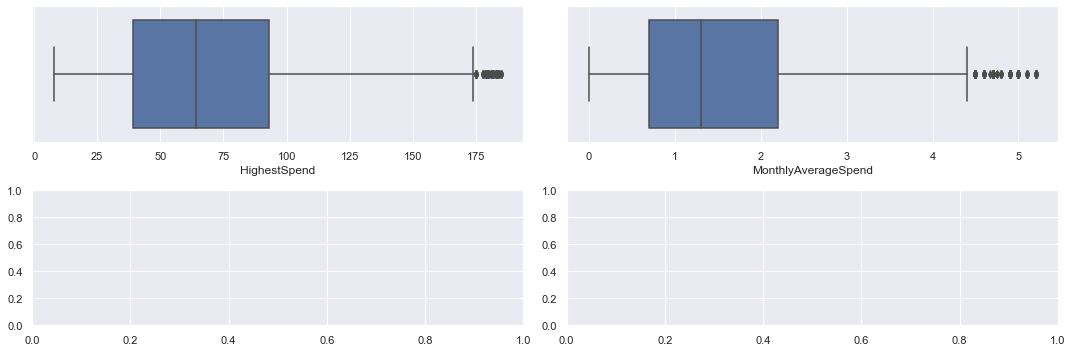

In [695]:
print('Check via box plots the skewness after removal of outliers')
fig, ax = plt.subplots(2, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(x=df_bank['HighestSpend'],ax=ax[0][0]);
sns.boxplot(x=df_bank['MonthlyAverageSpend'],ax=ax[0][1]);

fig.tight_layout() 
plt.show()

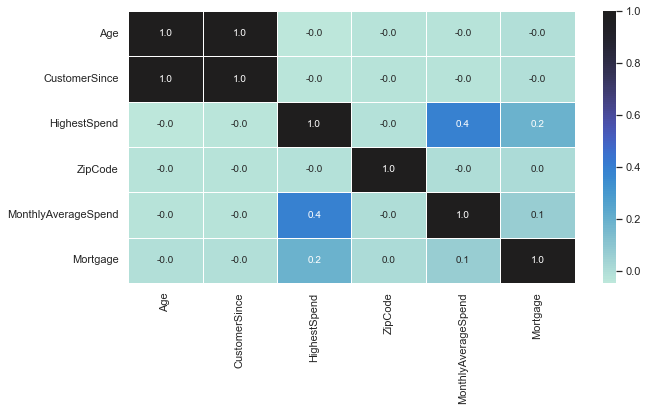

Age and customersince has correlation as 1.hence one feature can be dropped
HighestSpend has correlation with monthlyaveragespend


In [701]:
plt.figure(figsize=(10,5))
sns.heatmap(df_bank.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()
print('Age and customersince has correlation as 1.hence one feature can be dropped')
print('HighestSpend has correlation with monthlyaveragespend')

checking how LoanOnCard varies for each of the variable

HiddenScore is high for noncardholders


C:\Users\91963\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


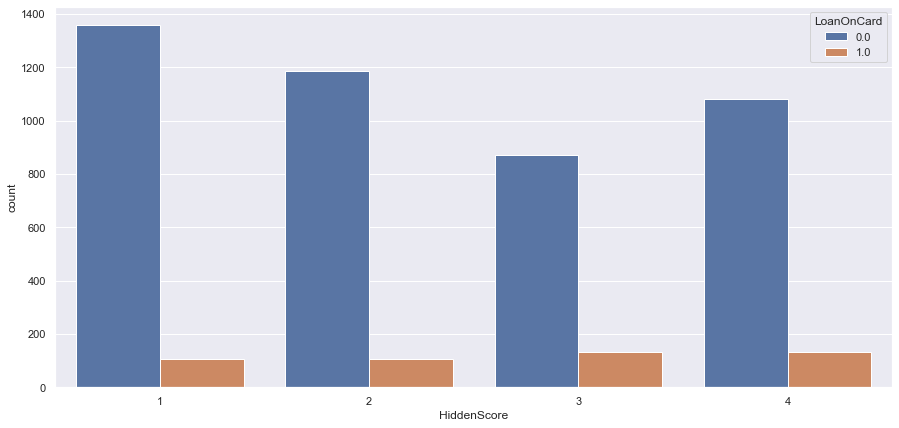

In [711]:
print('checking how LoanOnCard varies for each of the variable\n')
plt.figure(figsize=(15,7))
sns.countplot(df_bank['HiddenScore'],hue=df_bank['LoanOnCard'])
print('HiddenScore is high for noncardholders' )

checking how LoanOnCard varies for each of the variable

Security on cardholders is low


C:\Users\91963\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


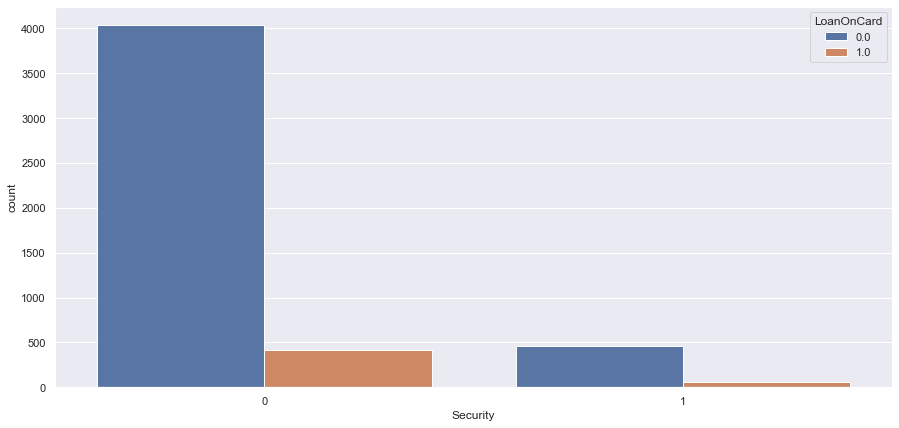

In [713]:
print('checking how LoanOnCard varies for each of the variable\n')
plt.figure(figsize=(15,7))
sns.countplot(df_bank['Security'],hue=df_bank['LoanOnCard'])
print('Security on cardholders is low' )

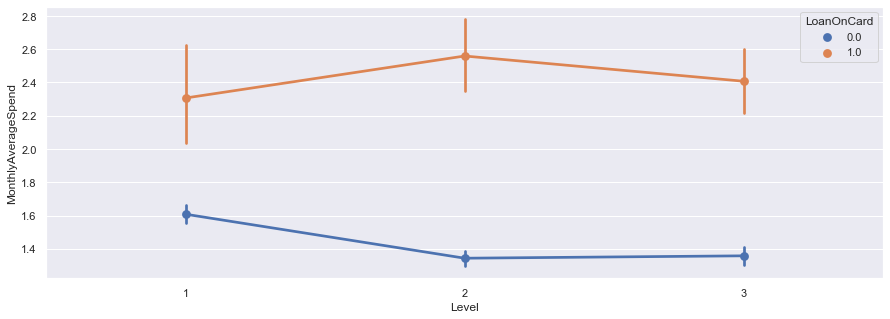

loan holder spend more money.Particulary the spend is more on level 2 and 3


In [719]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Level", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=df_bank)
plt.show()
print('loan holder spend more money.Particulary the spend is more on level 2 and 3')

In [723]:
print('Data Preparation and model building: [10 Marks]\n')
print('Split data into X and Y. [1 Marks]\n')
print(' ID column dropped Dropping ZipCode')
df_bank.drop('ZipCode',axis=1,inplace=True)

Data Preparation and model building: [10 Marks]

Split data into X and Y. [1 Marks]

 ID column dropped Dropping ZipCode


In [724]:
df_bank.head(5)

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,1,1.0,3,0,0,0,0,0,1.0
10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,4,2.5,2,0,0,0,1,0,0.0


In [738]:
X = df_bank.drop(labels= "LoanOnCard" , axis = 1)
y = df_bank["LoanOnCard"]
y=y.astype('int')

In [740]:
print('Split X and y into training and test set in 75:25 ratio')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

Split X and y into training and test set in 75:25 ratio


In [744]:
print('Train a Supervised Learning Classification base model - Logistic Regression.')

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model_LR = LogisticRegression(solver="liblinear")
model_LR.fit(X_train, y_train)
#predict on test
y_predict = model_LR.predict(X_test)


Train a Supervised Learning Classification base model - Logistic Regression.


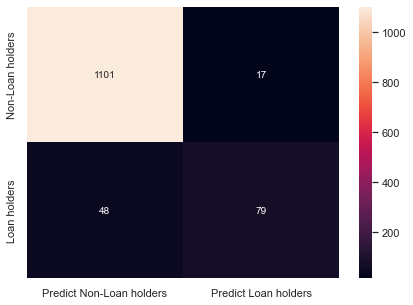

the 48 False Negatives who are loan holders but predicted as non  loan holders are costly 
 


In [752]:
cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Predict Non-Loan holders","Predict Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()
print('the 48 False Negatives who are loan holders but predicted as non  loan holders are costly \n ')

In [759]:
model_score = model_LR.score(X_test, y_test)
print('model_score is :',model_score)
print("classification  Matrix:\n",classification_report(y_test,y_predict))
print('the Recall for class 1 is 62% that is only 62% of predicted correctly of the  actual class 1 values  ')
print('As the data on class 1 was less hence maybe the recall value is less')

model_score is : 0.9477911646586346
classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1118
           1       0.82      0.62      0.71       127

    accuracy                           0.95      1245
   macro avg       0.89      0.80      0.84      1245
weighted avg       0.94      0.95      0.94      1245

the Recall for class 1 is 62% that is only 62% of predicted correctly of the  actual class 1 values  
As the data on class 1 was less hence maybe the recall value is less


In [780]:
print('Balance the data using the right balancing technique. [2 Marks]\n')
sample_data=pd.concat([df_bank[df_bank['LoanOnCard']==0].sample(480),df_bank[df_bank['LoanOnCard']==1]])
X_bal=sample_data.drop('LoanOnCard', axis=1)
y_bal=sample_data['LoanOnCard']
y_bal=y_bal.astype('int')
print(y.value_counts())
print('we have balanced the data')

Balance the data using the right balancing technique. [2 Marks]

0.0    480
1.0    480
Name: LoanOnCard, dtype: int64
we have balanced the data


In [781]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.25, random_state=10)


In [782]:
# Fit the model on train
model_LR = LogisticRegression(solver="liblinear")
model_LR.fit(X_train_bal, y_train_bal)
#predict on test
y_predict_bal= model_LR.predict(X_test_bal)

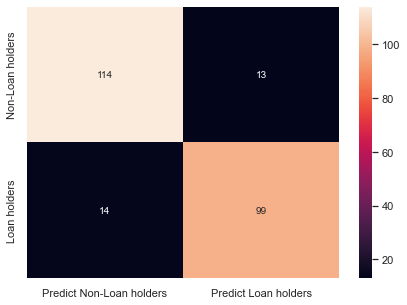

the 14 False Negatives who are loan holders but predicted as non  loan holders which has changed from 48 
 


In [785]:
cm = confusion_matrix(y_test_bal, y_predict_bal, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Predict Non-Loan holders","Predict Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()
print('the 14 False Negatives who are loan holders but predicted as non  loan holders which has changed from 48 \n ')

In [789]:
model_score_bal = model_LR.score(X_test_bal, y_test_bal)
print('model_score is :',model_score_bal)
print("classification  Matrix:\n",classification_report(y_test_bal,y_predict_bal))
print('the Recall for class 1 is 88% that was only 62% at imbalanced data ')
print('accuracy is 89% which same to recall of class 1 and 0 after balancing')

model_score is : 0.8875
classification  Matrix:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       127
           1       0.88      0.88      0.88       113

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240

the Recall for class 1 is 88% that was only 62% at imbalanced data 
accuracy is 89% which same to recall of class 1 and 0 after balancing


In [802]:
print('Performance Improvement: [10 Marks]\n')
print('basic KNN model\n')
NNH.fit(X_train, y_train)
score_train = NNH.score(X_train, y_train)
print('the accuracy of a basic KNN model with  in train n=9  is:',score_train*100)
score_test = NNH.score(X_test, y_test)
print('the accuracy of a basic KNN model with  in train n=9  is:',score_test*100)
print('we can see that the model does not good in training but comparitively in test data accuracy is less')

Performance Improvement: [10 Marks]

basic KNN model

the accuracy of a basic KNN model with  in train n=9  is: 100.0
the accuracy of a basic KNN model with  in train n=9  is: 91.16465863453816
we can see that the model does not good in training but comparitively in test data accuracy is less


In [809]:
print('basic SVM model\n')
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
score_train = clf.score(X_train, y_train)
print('the accuracy of a basic svm model is:',score_train*100)
score_test = clf.score(X_test, y_test)
print('the accuracy of a basic svm model is:',score_test*100)
print('modle does good in train and test data acround 94.8% accruacy')

basic SVM model

the accuracy of a basic svm model is: 95.2342704149933
the accuracy of a basic svm model is: 94.85943775100402
modle does good in train and test data acround 94.8% accruacy


In [806]:
print('tunining the parameter\n')
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf','linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

tunining the parameter

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=   1.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=   1.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   1.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   1.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   1.2s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.952 total time=   0.9s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.960 total time=   1.3s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.954 total time=   1.3s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.938 total time=   1.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.949 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.906 total time=   0.4s
[CV 2/5] END .....C=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [807]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=0.1, gamma=0.1, kernel='linear')


In [811]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))
print('SVM model does good in train and test data acround 95% accruacy and 99% pn class 0 model and 58% on class 1 as we have imbalanced data')

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1118
           1       0.87      0.58      0.70       127

    accuracy                           0.95      1245
   macro avg       0.91      0.79      0.84      1245
weighted avg       0.95      0.95      0.94      1245

SVM model does good in train and test data acround 95% accruacy and 99% pn class 0 model and 58% on class 1 as we have imbalanced data


check how knn performs

euclidiean: 0.893987 (0.018817)
manhattan: 0.902813 (0.022263)


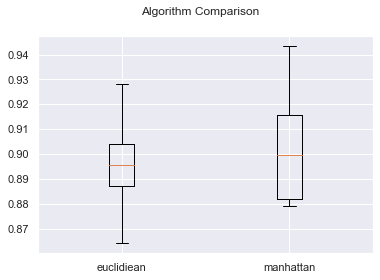

SVM gives better results that KNN



In [814]:
print('check how knn performs\n')
from sklearn import model_selection
KNN_model_euclidiean = KNeighborsClassifier(n_neighbors=13, metric = 'euclidean' ) 
KNN_model_manhattan = KNeighborsClassifier(n_neighbors=13, metric = 'manhattan' ) 
seed = 7
# prepare models
models = []
models.append(('euclidiean', KNN_model_euclidiean))
models.append(('manhattan', KNN_model_manhattan))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,  X_test,y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
print('SVM gives better results that KNN\n')

In [817]:
print('final notes\n')
print('on imbalanced data Logistic regression performs best with accuracy of 94.77% and 78% recall for class 1\n')
print('on imbalanced data SVM performs better than KNN with 95% accruracy on test data  and 99% on class 0 model and 58% on class 1 ')

final notes

on imbalanced data Logistic regression performs best with accuracy of 94.77% and 78% recall for class 1

on imbalanced data SVM performs better than KNN with 95% accruracy on test data  and 99% on class 0 model and 58% on class 1 
